# Loan Status Prediction with Perceptron Neural Network


## Overview
This project demonstrates how to preprocess loan data, encode features, and train a simple perceptron neural network using PyTorch to predict loan status. The workflow includes data loading, preprocessing, model definition, training, evaluation, and visualization.


## Project Structure

- `loan_data.csv` — Input dataset containing loan features and the `loan_status` target.
- neural_network_scikitlearn.ipynb — Main Jupyter notebook with all code and analysis.

---

## Requirements

- Python 3.8+
- torch
- pandas
- matplotlib
- seaborn
- scikit-learn

Install dependencies with:
```bash
pip install torch pandas matplotlib seaborn scikit-learn
```

## Workflow

### 1. Data Loading & Exploration

- Load the dataset using pandas.
- Visualize feature distributions and class balance with matplotlib and seaborn.

### 2. Feature Preparation

- Separate features (`X`) and target (`y`).
- Identify numeric and categorical columns.
- Preprocess:
  - Numeric: Impute missing values, scale features.
  - Categorical: Impute missing values, one-hot encode.

### 3. Train/Test Split

- Split the data into training and testing sets using `train_test_split`.

### 4. Target Encoding

- Encode the `loan_status` target as integers using `LabelEncoder`.

### 5. Tensor Conversion

- Convert features and labels to PyTorch tensors for model training.

### 6. Model Definition

- Define a simple Perceptron class using PyTorch’s `nn.Module`.
- Implement a custom Heaviside step function for binary classification.

### 7. Training

- Train the perceptron using a custom loss function and manual parameter updates.
- Print training progress, weights, bias, and loss per epoch.

### 8. Evaluation

- Predict on the test set.
- Calculate and print accuracy.

### 9. Visualization

- Plot the test set with predicted classes for visual inspection.

---

## Usage

1. Place `loan_data.csv` in the project directory.
2. Open and run neural_network_scikitlearn.ipynb in Jupyter.
3. Follow the notebook cells sequentially.

---


In [26]:
# Import the necessary libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'loan_status'}, xlabel='loan_status', ylabel='count'>

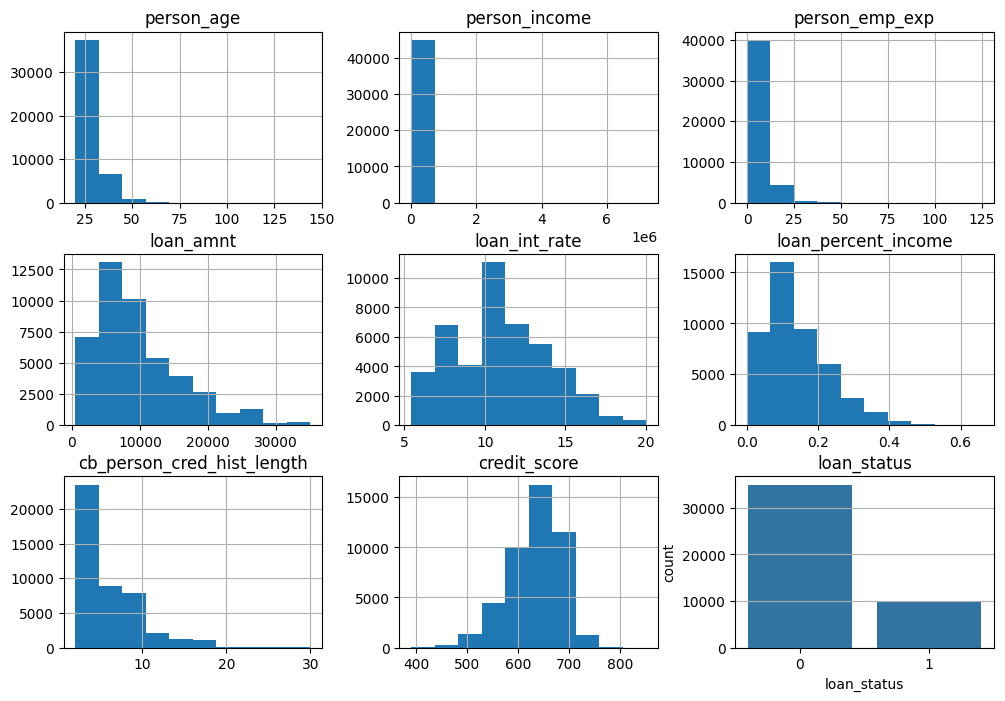

In [27]:
loan_df = pd.read_csv("loan_data.csv")

loan_df.hist(figsize=(12,8))
sns.countplot(x="loan_status", data=loan_df)

In [28]:
X = loan_df.drop("loan_status", axis=1)
y = loan_df["loan_status"]

In [29]:
numeric_cols = X.select_dtypes(include="number").columns
categorical_cols = X.select_dtypes(exclude="number").columns
numeric_cols

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scale the input features 
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [31]:
X_preproc = preprocessor.fit_transform(X)

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preproc,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )


In [33]:
# Encode target labels as integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [34]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [35]:
# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [36]:
torch.random.seed()

10473865678647965133

In [37]:
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)
        
    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >=0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)
    
    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)
        


In [38]:
# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

In [39]:
# loss function
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost

In [40]:
# Learning Rate
learning_rate = 0.001

In [ ]:
# Train the Perceptron on the training data
num_epochs = 100
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight &amp; bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))

Epoch [1/100], weight:[[-0.00040328 -0.00050442 -0.0007107   0.00041443  0.00675803  0.00518313
  -0.00223918 -0.00168058  0.06807751  0.07118107  0.08425234  0.08503656
   0.08738434  0.08235946  0.08575677 -0.09083636 -0.14272203 -0.09162801
  -0.08587715  0.07259598  0.06648358  0.07021572  0.06943225  0.06473339
   0.06895153  0.06185184 -0.19118108]], bias:[-0.19454536] Loss: 39.0000
Epoch [2/100], weight:[[ 3.75459553e-04 -7.10426248e-05 -8.91137752e-05  1.21501111e-03
   6.25451980e-03  4.96326713e-03 -2.13670870e-03 -3.56073654e-03
   7.00775161e-02  7.21810758e-02  8.32523331e-02  8.60365629e-02
   8.93843472e-02  8.23594630e-02  8.67567733e-02 -9.88363773e-02
  -1.13721967e-01 -1.00628026e-01 -9.48771685e-02  7.25959837e-02
   6.64835796e-02  7.02157170e-02  7.04322532e-02  6.67333901e-02
   6.89515322e-02  6.48518428e-02 -1.91181079e-01]], bias:[-0.19154535] Loss: -3.0000
Epoch [3/100], weight:[[-0.00045166 -0.00266072  0.0007355  -0.00105537  0.00674801  0.00370197
  -0.002

In [ ]:
# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

Accuracy on Test Dataset: 0.858222246170044


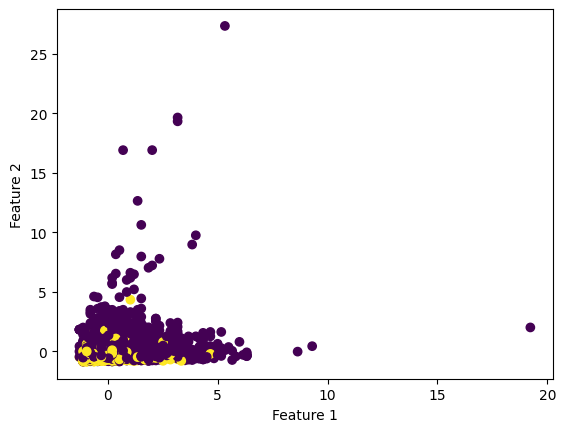

In [ ]:
# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Notes

- The perceptron model is suitable for binary classification.
- Ensure your dataset’s `loan_status` column contains only two classes.
- For more complex tasks, consider using deeper neural networks or other models.

---

## References

- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
- [scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [pandas Documentation](https://pandas.pydata.org/docs/)
- [matplotlib Documentation](https://matplotlib.org/stable/users/index.html)
- [seaborn Documentation](https://seaborn.pydata.org/)

---